In [ ]:
#importing matplotlib, pandas, numpy for plotting data, load data and to perform operations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#loading train dataset
X_train = pd.read_csv("http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt", delimiter='\t', header=None )
#creating a new dataframe of only train Target column
y_train = pd.DataFrame(X_train[85])
# removing the target column from train dataset 
X_train = X_train.drop(columns=[85], axis=1)

#loading X test dataset 
X_test = pd.read_csv("http://kdd.ics.uci.edu/databases/tic/ticeval2000.txt", delimiter='\t', header=None )
#loading y test dataset
y_test = pd.read_csv("http://kdd.ics.uci.edu/databases/tic/tictgts2000.txt", delimiter='\t', header=None )

In [ ]:
#printing shapes of each dataset
print("X_train shape : ",X_train.shape," y_train shape : ", y_train.shape )
print("X_test shape : ",X_test.shape," y_test shape : ", y_test.shape )

X_train shape :  (5822, 85)  y_train shape :  (5822, 1)
X_test shape :  (4000, 85)  y_test shape :  (4000, 1)


### **Question 1**
Finding Top 10 important features

In [ ]:
#importing SelectKBest module to find k best features
from sklearn.feature_selection import SelectKBest
#importing chi square module to select it as a scoring function 
from sklearn.feature_selection import chi2

In [ ]:
#creating a model of SelectKBest with scoring function and k value as the no. of features
bestfeatures = SelectKBest(score_func=chi2, k=10)
#fitting train datasets on model
skb_fit = bestfeatures.fit(X_train, y_train)


In [ ]:
#creating a dataframe to view each features with their scores
dfscores = pd.DataFrame(skb_fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [ ]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['feature', 'Scores']
featureScores

,feature,Scores
0,0,190.696878
1,1,0.083062
2,2,1.715433
3,3,0.026041
4,4,39.514947
...,...,...
80,80,3.994726
81,81,72.088379
82,82,9.506733
83,83,1.958995


In [ ]:
# creating data frame of just top 10 features
Top10features = pd.DataFrame(featureScores.nlargest(10, 'Scores'))
Top10features

,feature,Scores
46,46,380.691708
60,60,191.696446
0,0,190.696878
58,58,100.332586
29,29,82.130521
63,63,80.693160
67,67,78.757821
15,15,75.173970
81,81,72.088379
30,30,71.638337


In [ ]:
#getting a list of feature column names or index values and making the hypothesis that these features are important and give best accuracy
T = list(Top10features['feature'])
print("Index of Top10 features : ",T," X_train[T].shape : ",X_train[T].shape," y_train.shape : ",y_train.shape)

Index of Top10 features :  [46, 60, 0, 58, 29, 63, 67, 15, 81, 30]  X_train[T].shape :  (5822, 10)  y_train.shape :  (5822, 1)


### **Question 2**
Using Logistic Regression with l1 regularization to find important features with the hep of gridsearch to find best parameter c for logistic regularization

In [ ]:
#Using logreg to get features to compare with our hypothesis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#grid={"C":[0.001,0.1,0.-0.001]}# l1 lasso l2 ridge

In [ ]:
#grid={"C":np.logspace(-1,1,10)}# l1 lasso l2 ridge , class_weight={ 0:0.5, 1:9.5 }
grid={"C":[0.1,0.001,0.004,0.008,-0.1]}# l1 lasso l2 ridge
#creating model with l1 penalty with liblinear solver
logreg=LogisticRegression(penalty="l1", solver='liblinear')
#implementing gridsearch with 10 folds
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
#printing the best parameters and accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001}
accuracy : 0.9402268159124801


In [ ]:
#printing test accuracy
logreg_cv.score(X_test,y_test)

0.9405

In [ ]:
#printing the coefficients of model to find non-zero coefficients
print("Number of features used: {}".format(np.sum(logreg_cv.best_estimator_.coef_ != 0)))
coef = logreg_cv.best_estimator_.coef_
coef

Number of features used: 5


array([[-0.06111262,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.02820459,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.0903577 ,  0.        ,  0.        , -0.04660976,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.0114366 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

Hear it can be seen that logistic regession non-zero coefficients features are 5 and when compared with our hypothesis then our hypothesis was wrong, following are there index values to compare.

Features in LogistcRegression = [0,9,31,34,42]

Features in SelectKBest = [46, 60, 0, 58, 29, 63, 67, 15, 81, 30]

Common correct predicted features are = [ 0 ] 

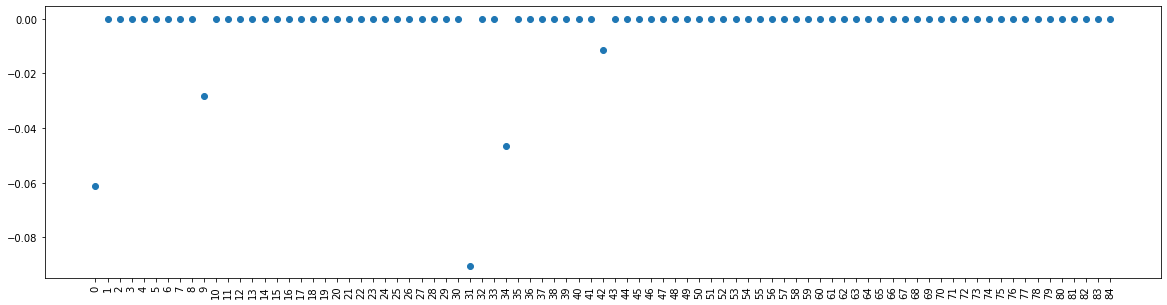

In [ ]:
#plotting coefficients of logreg model
fig,axs= plt.subplots(1,1, figsize = (20,5))
axs.plot(logreg_cv.best_estimator_.coef_.T, 'o', label="C=0.001")
plt.xticks(X_train.columns, rotation=90)
plt.show()

### **Question 3**
using polynomial features again with logreg with l1 to see if accuracy increases

In [ ]:
# importing polynomial features module and different scaling module and pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#generating polynomial features with logreg without scaling
pipe = make_pipeline( PolynomialFeatures(), LogisticRegression(penalty='l1', solver='liblinear',C=0.001))
pipe.fit(X_train,y_train)
'''for param in grid.get_params().keys():
    print(param)'''

'for param in grid.get_params().keys():\n    print(param)'

In [ ]:
#printing the accuracies of training and test data
print("accuracy :",pipe.score(X_train,y_train))
print("accuracy :",pipe.score(X_test,y_test))

accuracy : 0.9402267262109241
accuracy : 0.9405


In [ ]:
#Generating polynomial features with scaling
pipe_scaler = make_pipeline( StandardScaler(), PolynomialFeatures(), LogisticRegression(penalty='l1', solver='liblinear', C=0.001))
pipe_scaler.fit(X_train,y_train)
'''for param in grid.get_params().keys():
    print(param)'''

'for param in grid.get_params().keys():\n    print(param)'

In [ ]:
print("accuracy :",pipe_scaler.score(X_train,y_train))
print("accuracy :",pipe_scaler.score(X_test,y_test))

accuracy : 0.9402267262109241
accuracy : 0.9405


We can see with accuracy scores of training and test set even after scaling does not increase in training but slight increase in test set

### **Question 4**
Using different classification models(trees, forests, gradient boosting, SVM) to improve results

Best model considered on its f-score

In [ ]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# splitting the train dataset to apply oversampling and test on validation set
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = .1, random_state=12)

In [ ]:
# importing SVM SMOTE module for oversampling
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=12)
#from imblearn.over_sampling import RandomOverSampler
#rus = RandomOverSampler(random_state=1)
x_train_res, y_train_res = sm.fit_sample(X_train1, y_train1)

In [ ]:
#RandomForestClassifier model and fitting on oversampled data
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12, class_weight={0:0.3, 1: 0.7})
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.3, 1: 0.7}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=25, n_jobs=None, oob_score=False,
                       random_state=12, verbose=0, warm_start=False)

In [ ]:
# printing score of validation dataset of oversampled data
print('Validation Results')
print(clf_rf.score(X_val, y_val))

Validation Results
0.9073756432246999


In [ ]:
#printing accuracy score on test data
print(clf_rf.score(X_test, y_test))

0.913


In [ ]:
#printing confusion matrix to understand distribution of true and false data between actcual and presdicted values
from sklearn.metrics import confusion_matrix
y_pred=clf_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(clf_rf.score(X_test, y_test))

[[3628  134]
 [ 214   24]]
0.913


In [ ]:
#printing classification report to scores of precision and recall on each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3762
           1       0.15      0.10      0.12       238

    accuracy                           0.91      4000
   macro avg       0.55      0.53      0.54      4000
weighted avg       0.90      0.91      0.90      4000



In [ ]:
# printing f1 scores
from sklearn.metrics import f1_score,roc_auc_score, roc_curve
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, y_pred)))

f1_score of random forest: 0.121


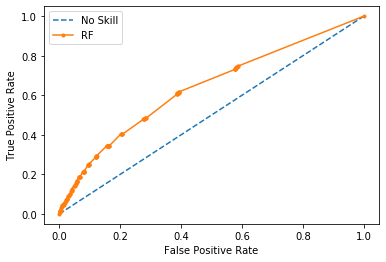

In [ ]:
# generating a list of zeroes for no skill prediction
ns_probs = [0 for _ in range(len(y_test))]
# predicting probabilities of test data
lr_probs = clf_rf.predict_proba(X_test)
# keeping only positive probabilities
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, i = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, i = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RF')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

2nd Model 

In [ ]:
#Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#creating model 
gbrt = GradientBoostingClassifier(random_state=0)
#fitting oversampled or resampled data to model and printing training and testing accuracy 
gbrt.fit(x_train_res, y_train_res)
print("accuracy on training set: %f" % gbrt.score(x_train_res, y_train_res))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.938338
accuracy on test set: 0.893500


In [ ]:
#predicting y values from test data
y_pred=gbrt.predict(X_test)
#printing confusion matrix and accuracy score
print(confusion_matrix(y_test, y_pred))
print(gbrt.score(X_test, y_test))

[[3525  237]
 [ 189   49]]
0.8935


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3762
           1       0.17      0.21      0.19       238

    accuracy                           0.89      4000
   macro avg       0.56      0.57      0.57      4000
weighted avg       0.90      0.89      0.90      4000



In [ ]:
#printing f1 score of Gradient Bossting model
print("f1_score of Gradient Boosting: {:.3f}".format(f1_score(y_test, y_pred)))

f1_score of Gradient Boosting: 0.187


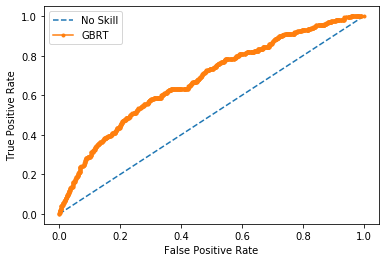

In [ ]:
# predict probabilities
lr_probs = gbrt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
ns_fpr, ns_tpr,i = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,i = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GBRT')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

3rd Model

In [ ]:
#importing support vector machine classifier
from sklearn.svm import SVC
#param_grid = [{'kernel': ['linear'], 'gamma': [1],'C': [1]}]

#param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}  
  
#clf_svc = GridSearchCV(SVC(probability=True), param_grid)
#creataing model with best parameters evaluated from gridsearchcv
clf_svc = SVC(probability=True, kernel='linear', gamma=1, C=1)

# fitting the model for grid search 
clf_svc.fit(x_train_res, y_train_res)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
'''# print best parameter after tuning 
print(clf_svc.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(clf_svc.best_estimator_) '''

'# print best parameter after tuning \nprint(clf_svc.best_params_) \n  \n# print how our model looks after hyper-parameter tuning \nprint(clf_svc.best_estimator_) '

In [ ]:
# printing training resampled and test data accuracy
print("accuracy on training set: %f" % clf_svc.score(x_train_res, y_train_res))
print("accuracy on test set: %f" % clf_svc.score(X_test, y_test))

accuracy on training set: 0.932649
accuracy on test set: 0.922000


In [ ]:
y_pred=clf_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(clf_svc.score(X_test, y_test))

[[3666   96]
 [ 216   22]]
0.922


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.19      0.09      0.12       238

    accuracy                           0.92      4000
   macro avg       0.57      0.53      0.54      4000
weighted avg       0.90      0.92      0.91      4000



In [ ]:
#printing f1 score of SVM model
print("f1_score of SVM: {:.3f}".format(f1_score(y_test, y_pred)))

f1_score of SVM: 0.124


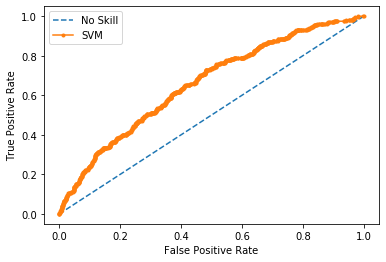

In [ ]:
# predict probabilities
lr_probs = clf_svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, i = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, i = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

The best model based on f1 score is Gradient Boosting Model with testing accuracy 0.893, traing accuracy 0.938 and f1 score 0.187

### **Question 5**
Explainable model with accuracy closer to of best model

In [ ]:
#creating data set of only few important features based on our assumption from 1st question
X_train_expl = pd.DataFrame(X_train, columns = [0,15,29,30,46,58,60,63,67,81])
X_test_expl = pd.DataFrame(X_test, columns = [0,15,29,30,46,58,60,63,67,81])

In [ ]:
print(X_train_expl.shape, y_train.shape)

(5822, 10) (5822, 1)


First Testing the data on logreg model to see if its accuracy matches with the best model

In [ ]:
logreg=LogisticRegression(penalty="l1", solver='liblinear')
logreg.fit(X_train_expl,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#printing test data accuracy
logreg.score(X_test_expl,y_test)

0.94025

Secondly Testing the data on decision tree model to see if its accuracy matches with the best model

In [ ]:
#applying Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=3)

In [ ]:
tree.fit(X_train_expl, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.93925

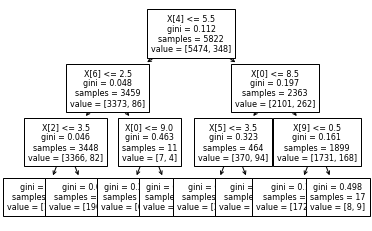

In [ ]:
#plotting tree and printing score
from sklearn.tree import plot_tree
tree_dot = plot_tree(tree, fontsize=8)
tree.score(X_test_expl,y_test)

In Both the explainable models we get accuracy score close to our best model but Decision Tree's accuracy is almost the same with the tuned parameter of depth